# CLIP Feature Effectiveness
Here we demonstrate if CLIP feature consists of semantic primitives valuable for landing an airplane

In [12]:
import torch
import clip
from PIL import Image
from pathlib import Path
from IPython.display import display

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

In [3]:
root = Path("D:\\dataset\\flybyml_dataset")
img_root = root / "image"

In [189]:
pair1 = ["cockpit view aligned with runway", "cockpit view unaligned with runway"]
pair2 = ["a photo of good visibility ahead", "a photo of bad visibility ahead"]
pair3 = ["a photo of horizon tilted", "a photo of horizon not tilted"]

In [190]:
def plot(img_path, pair):
    img = Image.open(img_path)
    image = preprocess(img).unsqueeze(0).to(device)
    text = clip.tokenize(pair).to(device)

    with torch.no_grad():
        logits_per_image, _ = model(image, text)
        probs = logits_per_image.softmax(dim=-1).cpu().numpy()
    width = 500
    img = img.resize((width, int(img.size[1] * (width / img.size[0])))) 
    display(img)
    for pair_text, prob in zip(pair, probs[0]):
        print(f"{pair_text} : {prob}")

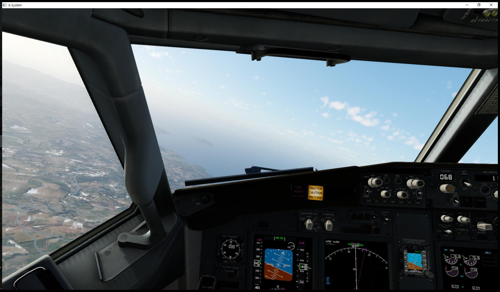

a photo of good visibility ahead : 0.76904296875
a photo of bad visibility ahead : 0.23095703125


In [191]:
plot(img_root / "2a4a5191-989e-495c-b3aa-32d1aad9f37b" / "00125.jpg", pair2)

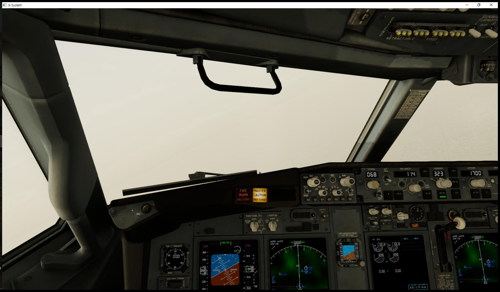

a photo of good visibility ahead : 0.388671875
a photo of bad visibility ahead : 0.611328125


In [192]:
plot(img_root / "5f918e64-366c-4456-8ec0-be62ff53fd21" / "00093.jpg", pair2)

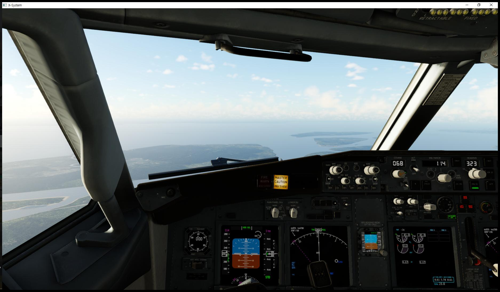

a photo of horizon tilted : 0.64794921875
a photo of horizon not tilted : 0.352294921875


In [193]:
plot(img_root / "70c35ab3-8f03-4480-bfd4-11a6a6e120ee" / "00125.jpg", pair3)

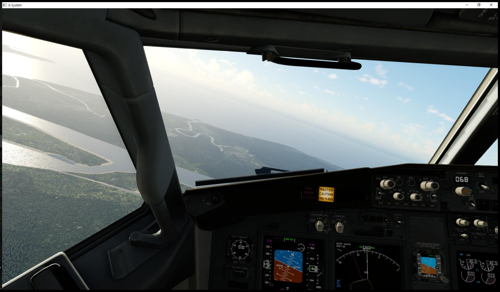

a photo of horizon tilted : 0.71240234375
a photo of horizon not tilted : 0.287841796875


In [194]:
plot(img_root / "70c35ab3-8f03-4480-bfd4-11a6a6e120ee" / "00219.jpg", pair3)

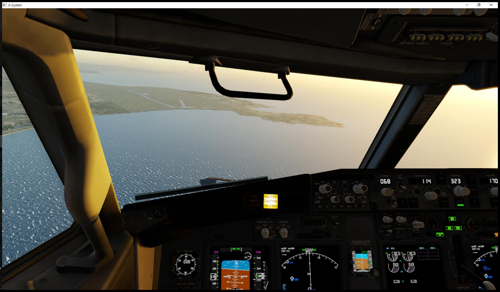

cockpit view aligned with runway : 0.453369140625
cockpit view unaligned with runway : 0.546875


In [195]:
plot(img_root / "19a67712-bf7a-4166-97c8-4b1bd7c0e42a" / "00300.jpg", pair1)

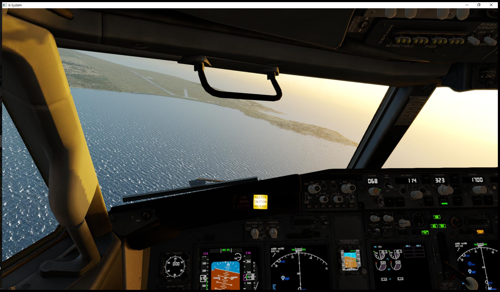

cockpit view aligned with runway : 0.47265625
cockpit view unaligned with runway : 0.52734375


In [196]:
plot(img_root / "19a67712-bf7a-4166-97c8-4b1bd7c0e42a" / "00321.jpg", pair1)

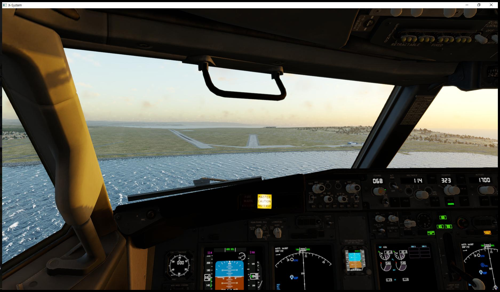

cockpit view aligned with runway : 0.56591796875
cockpit view unaligned with runway : 0.43408203125


In [197]:
plot(img_root / "19a67712-bf7a-4166-97c8-4b1bd7c0e42a" / "00452.jpg", pair1)

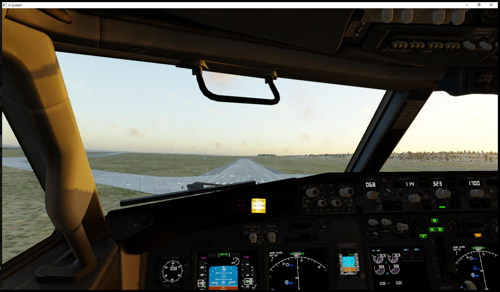

cockpit view aligned with runway : 0.56201171875
cockpit view unaligned with runway : 0.437744140625


In [198]:
plot(img_root / "19a67712-bf7a-4166-97c8-4b1bd7c0e42a" / "00500.jpg", pair1)

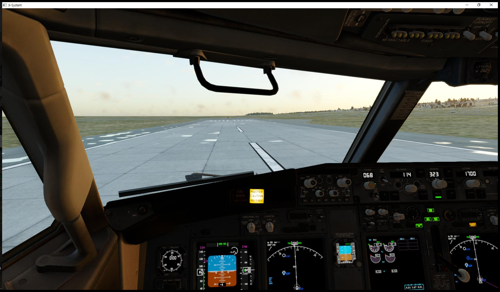

cockpit view aligned with runway : 0.53125
cockpit view unaligned with runway : 0.46875


In [199]:
plot(img_root / "19a67712-bf7a-4166-97c8-4b1bd7c0e42a" / "00555.jpg", pair1)